In [2]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import netCDF4

In [3]:
url = 'oco2_GEOS_L3CO2_month_201502_B10206Ar.nc4'

In [4]:
df_oco3= netCDF4.Dataset('oco2_GEOS_L3CO2_month_201502_B10206Ar.nc4')

In [5]:
df_oco3

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    RangeBeginningDate: 2015-02-01
    RangeBeginningTime: 00:00:00.000000
    RangeEndingDate: 2015-02-01
    RangeEndingTime: 23:59:99.999999
    SpatialCoverage: global
    SouthBoundingCoordinate: -90.0
    NorthBoundingCoordinate: 90.0
    WestBoundingCoordinate: -180.0
    EastBoundingCoordinate: 179.375
    LatitudeResolution: 0.5
    LongitudeResolution: 0.625
    DataResolution: 0.5x0.625
    Format: NetCDF-4/HDF-5
    Conventions: CF-1
    VersionID: V10r
    BuildId: B10.2.06
    IdentifierProductDOIAuthority: http://doi.org/
    Institution: NASA GSFC Global Modeling and Assimilation Office and OCO-2 Project, Jet Propulsion Laboratory
    Contact: Brad Weir (brad.weir@nasa.gov)
    ProductionDateTime: 2022-03-15T11:56:08Z
    History: Original file generated: Tue Mar 15 11:56:08 2022 GMT
    ShortName: OCO2_GEOS_L3CO2_MONTH_10r
    LongName: OCO-2 GEOS Level 3 monthly, 0.5x0.625 assimilate

In [6]:
XCO2_2015_test = h5py.File(url, 'r')
XCO2_2015_test.keys()

<KeysViewHDF5 ['XCO2', 'XCO2PREC', 'lat', 'lon', 'time']>

In [7]:
print('Latitude unit : {}'.format(XCO2_2015_test['lat'].attrs['units'].decode()))
print('Longitude unit : {}'.format(XCO2_2015_test['lon'].attrs['units'].decode()))
print('XCO2 data unit : {}'.format(XCO2_2015_test['XCO2'].attrs['units'].decode()))
print('XCO2PREC data unit : {}'.format(XCO2_2015_test['XCO2PREC'].attrs['units'].decode()))

Latitude unit : degrees_north
Longitude unit : degrees_east
XCO2 data unit : mol CO2/mol dry
XCO2PREC data unit : mol CO2/mol dry


In [8]:
print('Latitude shape : {}'.format(XCO2_2015_test['lat']))
print('Longitude shape : {}'.format(XCO2_2015_test['lon']))
print('XCO2 data shape : {}'.format(XCO2_2015_test['XCO2']))

Latitude shape : <HDF5 dataset "lat": shape (361,), type "<f8">
Longitude shape : <HDF5 dataset "lon": shape (576,), type "<f8">
XCO2 data shape : <HDF5 dataset "XCO2": shape (1, 361, 576), type "<f8">


In [9]:
latitude_values = list(XCO2_2015_test['lat'])
longitude_values = list(XCO2_2015_test['lon'])
XCO2_values = list(XCO2_2015_test['XCO2'])[0]
XCO2PREC_values = list(XCO2_2015_test['XCO2PREC'])[0]

In [10]:
latitude_values_for_df = np.repeat(latitude_values,len(longitude_values))
longitude_values_for_df =  np.array(longitude_values * len(latitude_values))

XCO2_values_for_df = XCO2_values.flatten()
XCO2PREC_values_for_df = XCO2PREC_values.flatten()

In [11]:
XCO2_df = pd.DataFrame({'lat_degrees_north' : latitude_values_for_df, 
                        'lon_degrees_east' : longitude_values_for_df, 
                        'XCO2_mol_CO2_mol_dry' : XCO2_values_for_df,  
                        'XCO2PREC_mol_CO2_mol_dry' : XCO2PREC_values_for_df} )

In [12]:
XCO2_df

,lat_degrees_north,lon_degrees_east,XCO2_mol_CO2_mol_dry,XCO2PREC_mol_CO2_mol_dry
0,-90.0,-180.000,0.000395,1.889822e-07
1,-90.0,-179.375,0.000395,1.889822e-07
2,-90.0,-178.750,0.000395,1.889822e-07
3,-90.0,-178.125,0.000395,1.889822e-07
4,-90.0,-177.500,0.000395,1.889822e-07
...,...,...,...,...
207931,90.0,176.875,0.000402,1.889822e-07
207932,90.0,177.500,0.000402,1.889822e-07
207933,90.0,178.125,0.000402,1.889822e-07
207934,90.0,178.750,0.000402,1.889822e-07


In [13]:
XCO2_df[(XCO2_df["lat_degrees_north"]>-4.5) & (XCO2_df["lat_degrees_north"]<4.0) & (XCO2_df["lon_degrees_east"]>33.9) & (XCO2_df["lon_degrees_east"]<41.90)]

,lat_degrees_north,lon_degrees_east,XCO2_mol_CO2_mol_dry,XCO2PREC_mol_CO2_mol_dry
99415,-4.0,34.375,0.000399,4.921543e-08
99416,-4.0,35.000,0.000398,4.582556e-08
99417,-4.0,35.625,0.000398,4.240366e-08
99418,-4.0,36.250,0.000398,3.899713e-08
99419,-4.0,36.875,0.000398,3.566998e-08
...,...,...,...,...
108063,3.5,39.375,0.000399,2.954548e-08
108064,3.5,40.000,0.000399,2.858764e-08
108065,3.5,40.625,0.000399,2.804648e-08
108066,3.5,41.250,0.000399,2.764866e-08


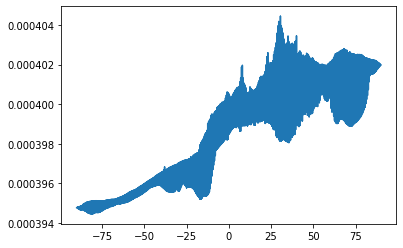

In [14]:
plt.plot(XCO2_df["lat_degrees_north"], XCO2_df["XCO2_mol_CO2_mol_dry"])  # Plot the chart
plt.show()  # display

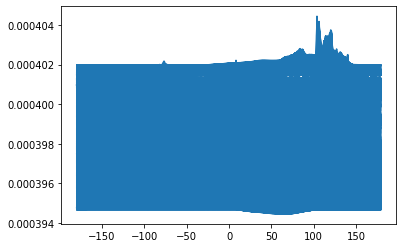

In [15]:
plt.plot(XCO2_df["lon_degrees_east"], XCO2_df["XCO2_mol_CO2_mol_dry"])  # Plot the chart
plt.show()  # display